<a href="https://colab.research.google.com/github/Christobell/DataCleansing-Data-Diabetes/blob/main/2318077DataCleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import Libraries


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/DataMining/diabetes.csv"# ganti sesuai path di Colab
df_dirty = pd.read_csv(file_path, delimiter=";") #untuk Membaca Kolom

#2.Dataset yang Kotor

In [ ]:
print("=== Dataset Asli ===")
print(df_dirty.head())
print("\nInfo Dataset:")
print(df_dirty.info())
print("\nJumlah Data & Kolom:", df_dirty.shape)

=== Dataset Asli ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   Diabetes PedigreeFunction  Age  Outcome  Unnamed: 9 Unnamed: 10  
0                      0.127   47        1         NaN         NaN  
1                      0.233   23        0         NaN         NaN  
2                      0.630   31        1         NaN         NaN  
3                      0.365   24        1         NaN         NaN  
4                      0.536   21        0         NaN         NaN  

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Colum

#3.Mengecek Missing Values

In [ ]:
print("\n=== Cek Missing Values ===")
print(df_dirty.isnull().sum())


=== Cek Missing Values ===
Pregnancies                     0
Glucose                         0
BloodPressure                   0
SkinThickness                   0
Insulin                         0
BMI                             0
Diabetes PedigreeFunction       0
Age                             0
Outcome                         0
Unnamed: 9                   2000
Unnamed: 10                  1999
dtype: int64


#4.Perbaikan Mssing Value

In [ ]:
# Identifikasi kolom missing Value
missing_cols = df_dirty.columns[df_dirty.isna().any()].tolist()
print("Kolom dengan missing value:", missing_cols)
missing_cols = df_dirty.columns[df_dirty.isna().any()].tolist()
# Isi nilai NaN dengan median tiap kolom (only for remaining columns)
for col in missing_cols:
    if df_dirty[col].dtype in ['int64', 'float64']: # Ensure column is numeric before calculating median
        median_value = df_dirty[col].median()
        df_dirty[col] = df_dirty[col].fillna(median_value)
    else:
        print(f"Skipping imputation for non-numeric column: {col}")
# === CEK HASIL IMPUTASI ===
print("\n========== CEK MISSING VALUE SETELAH IMPUTASI ==========")
print(df_dirty.isna().sum())

Kolom dengan missing value: ['Unnamed: 9', 'Unnamed: 10']
Skipping imputation for non-numeric column: Unnamed: 10

========== CEK MISSING VALUE SETELAH IMPUTASI ==========
Pregnancies                     0
Glucose                         0
BloodPressure                   0
SkinThickness                   0
Insulin                         0
BMI                             0
Diabetes PedigreeFunction       0
Age                             0
Outcome                         0
Unnamed: 9                   2000
Unnamed: 10                  1999
dtype: int64


#5.Cek Ulang Perbaikan Missing Value

In [ ]:
# === CEK ULANG MISSING VALUE ===
print("========== CEK ULANG MISSING VALUE ==========")
print(df_dirty.isna().sum())

# Total missing value di semua kolom
print("\nTotal missing value di semua kolom:", df_dirty.isna().sum().sum())

# Persentase missing value per kolom
missing_percent = (df_dirty.isna().sum() / len(df_dirty)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percent)

========== CEK ULANG MISSING VALUE ==========
Pregnancies                     0
Glucose                         0
BloodPressure                   0
SkinThickness                   0
Insulin                         0
BMI                             0
Diabetes PedigreeFunction       0
Age                             0
Outcome                         0
Unnamed: 9                   2000
Unnamed: 10                  1999
dtype: int64

Total missing value di semua kolom: 3999

Persentase missing value per kolom:
Pregnancies                    0.00
Glucose                        0.00
BloodPressure                  0.00
SkinThickness                  0.00
Insulin                        0.00
BMI                            0.00
Diabetes PedigreeFunction      0.00
Age                            0.00
Outcome                        0.00
Unnamed: 9                   100.00
Unnamed: 10                   99.95
dtype: float64


#6.Cek dan Hapus Duplikasi

In [ ]:
# === CEK DUPLIKASI ===
print("========== CEK DUPLIKASI ==========")
print("Jumlah data duplikat:", df_dirty.duplicated().sum())

# Kalau mau lihat beberapa baris duplikat
print("\nContoh baris duplikat:")
display(df_dirty[df_dirty.duplicated()].head())

# === HAPUS DUPLIKASI ===
df_dirty = df_dirty.drop_duplicates()

# === CEK ULANG SETELAH HAPUS ===
print("\n========== CEK ULANG DUPLIKASI ==========")
print("Jumlah data duplikat setelah dibersihkan:", df_dirty.duplicated().sum())
print("Jumlah data sekarang:", df_dirty.shape[0])


========== CEK DUPLIKASI ==========
Jumlah data duplikat: 1255

Contoh baris duplikat:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes PedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10
483,0,84,82,31,125,38.2,0.233,23,0,NaN,NaN
484,0,145,0,0,0,44.2,0.630,31,1,NaN,NaN
485,0,135,68,42,250,42.3,0.365,24,1,NaN,NaN
486,1,139,62,41,480,40.7,0.536,21,0,NaN,NaN
487,0,173,78,32,265,46.5,1.159,58,0,NaN,NaN



========== CEK ULANG DUPLIKASI ==========
Jumlah data duplikat setelah dibersihkan: 0
Jumlah data sekarang: 745


from matplotlib import pyplot as plt
_df_36['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='index', y='Pregnancies', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Pregnancies']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Pregnancies')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Glucose']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_45.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Glucose')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['BloodPressure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_46.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('BloodPressure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['SkinThickness']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_47.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('SkinThickness')

from matplotlib import pyplot as plt
_df_48['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Pregnancies'].plot(kind='line', figsize=(8, 4), title='Pregnancies')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Glucose'].plot(kind='line', figsize=(8, 4), title='Glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_51['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure')
plt.gca().spines[['top', 'right']].set_visible(False)

#7.Cek data Outlier pada kolom Numerik (Glucose, BloodPressure, SkinThickness, Insulin, BMI)

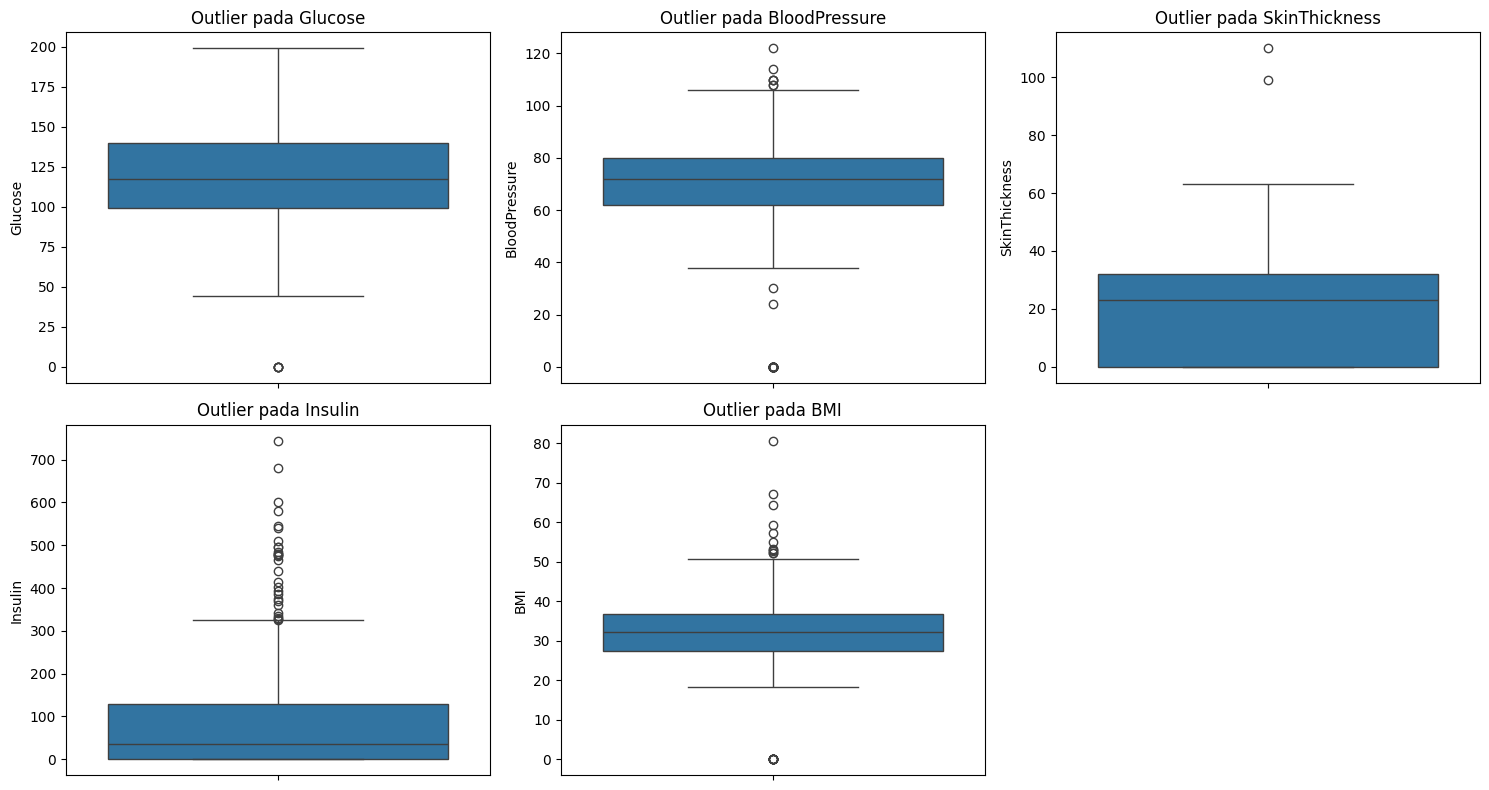


=== Jumlah Outlier per Kolom ===
Glucose: 5 outlier
BloodPressure: 44 outlier
SkinThickness: 2 outlier
Insulin: 28 outlier
BMI: 22 outlier


In [ ]:
import matplotlib.pyplot as plt # library dasar untuk visualisasi (plot grafik)
import seaborn as sns  # library di atas matplotlib, hasil grafik lebih rapih & estetik

# List kolom numerik yang dicek
kolom_numerik = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# 1. Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, kol in enumerate(kolom_numerik, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_dirty[kol])
    plt.title(f"Outlier pada {kol}")
plt.tight_layout()
plt.show()

# 2. Cek jumlah outlier pakai IQR
def cek_outlier_iqr(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[kolom] < lower) | (df[kolom] > upper)]
    return len(outliers)

print("\n=== Jumlah Outlier per Kolom ===")
for kol in kolom_numerik:
    print(f"{kol}: {cek_outlier_iqr(df_dirty, kol)} outlier")


#8.Cek Tipe Data

In [ ]:
print("\n=== Tipe Data Tiap Kolom ===")
print(df_dirty.dtypes)

# Kalau mau detail cek apakah ada yang bukan numerik
print("\nApakah semua kolom numerik?")
print(df_dirty.dtypes.apply(lambda x: x == "int64" or x == "float64"))

# Pastikan kolom target 'Outcome' bertipe integer
print("\nCek nilai unik Outcome:")
print(df_dirty['Outcome'].unique())



=== Tipe Data Tiap Kolom ===
Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
Diabetes PedigreeFunction    float64
Age                            int64
Outcome                        int64
Unnamed: 9                   float64
Unnamed: 10                   object
dtype: object

Apakah semua kolom numerik?
Pregnancies                   True
Glucose                       True
BloodPressure                 True
SkinThickness                 True
Insulin                       True
BMI                           True
Diabetes PedigreeFunction     True
Age                           True
Outcome                       True
Unnamed: 9                    True
Unnamed: 10                  False
dtype: bool

Cek nilai unik Outcome:
[1 0]


#9.Cek Konsistensi Data

In [ ]:
#Cek & perbaiki konsistensi data (nilai negatif)
num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
            'Insulin','BMI','Diabetes PedigreeFunction','Age']

print("=== Cek & Perbaiki Nilai Negatif ===")
for col in num_cols:
    invalid = (df_dirty[col] < 0).sum()
    print(f"{col}: jumlah nilai negatif = {invalid}")

    if invalid > 0:
        median_val = df_dirty[col].median()
        df_dirty.loc[df_dirty[col] < 0, col] = median_val
        print(f"  → Nilai negatif di kolom {col} diganti dengan median = {median_val}")

print("\nJumlah data setelah perbaikan:", df_dirty.shape)

=== Cek & Perbaiki Nilai Negatif ===
Pregnancies: jumlah nilai negatif = 0
Glucose: jumlah nilai negatif = 0
BloodPressure: jumlah nilai negatif = 0
SkinThickness: jumlah nilai negatif = 0
Insulin: jumlah nilai negatif = 0
BMI: jumlah nilai negatif = 0
Diabetes PedigreeFunction: jumlah nilai negatif = 0
Age: jumlah nilai negatif = 0

Jumlah data setelah perbaikan: (745, 11)


#10.Tampilan Beberapa Dataset Bersih

In [ ]:
print("\n=== 10 Data Pertama Setelah Cleansing ===")
display(df_dirty.head(10))

print("\n=== 10 Data Terakhir Setelah Cleansing ===")
display(df_dirty.tail(10))



=== 10 Data Pertama Setelah Cleansing ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes PedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10
0,2,138,62,35,0,33.6,0.127,47,1,NaN,NaN
1,0,84,82,31,125,38.2,0.233,23,0,NaN,NaN
2,0,145,0,0,0,44.2,0.630,31,1,NaN,NaN
3,0,135,68,42,250,42.3,0.365,24,1,NaN,NaN
4,1,139,62,41,480,40.7,0.536,21,0,NaN,NaN
5,0,173,78,32,265,46.5,1.159,58,0,NaN,NaN
6,4,99,72,17,0,25.6,0.294,28,0,NaN,NaN
7,8,194,80,0,0,26.1,0.551,67,0,NaN,NaN
8,2,83,65,28,66,36.8,0.629,24,0,NaN,NaN
9,2,89,90,30,0,33.5,0.292,42,0,NaN,NaN



=== 10 Data Terakhir Setelah Cleansing ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes PedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10
1559,0,136,74,49,220,20.1,0.820,44,1,NaN,NaN
1561,0,116,64,39,225,40.2,0.720,50,0,NaN,NaN
1562,2,142,94,59,177,38.3,0.620,63,1,NaN,NaN
1563,4,183,66,0,215,80.6,0.654,40,0,NaN,NaN
1564,1,100,62,0,0,64.4,0.152,36,0,NaN,NaN
1565,0,163,40,23,64,40.7,0.322,33,0,NaN,NaN
1566,6,139,84,37,0,50.7,0.320,50,1,NaN,NaN
1567,2,167,44,30,140,52.7,0.452,28,0,NaN,NaN
1568,3,162,0,110,215,48.7,0.520,24,0,NaN,NaN
1870,7,105,0,0,0,0.0,0.305,24,0,NaN,NaN


#11.Save Data Clean

In [ ]:
# Simpan dataset bersih di storage Colab
df_dirty.to_csv("diabetes_clean.csv", index=False)
print("Dataset bersih berhasil disimpan di Colab sebagai 'diabetes_clean.csv'")

# Download dataset bersih ke laptop
from google.colab import files
files.download("diabetes_clean.csv")


Dataset bersih berhasil disimpan di Colab sebagai 'diabetes_clean.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#12.Kesimpulan


1.   Pemeriksaan Data Awal
Dataset yang digunakan masih mengandung missing value, duplikasi, serta nilai yang tidak konsisten.
2.   Perbaikan Missing Value
Nilai kosong diisi menggunakan strategi tertentu (misalnya mean/median untuk numerik, modus atau kategori “Unknown” untuk kategorikal).
3.   Penghapusan Duplikasi
Data ganda berhasil dihapus sehingga tidak ada baris yang terulang.
4.   Pemeriksaan Outlier
Beberapa kolom numerik (Glucose, BloodPressure, Insulin, BMI, dll.) memiliki nilai ekstrim. Outlier terdeteksi menggunakan metode statistik/visualisasi.
5.   Pemeriksaan & Penyesuaian Tipe Data
Kolom dicek agar sesuai dengan tipe data yang benar (integer, float, atau kategorikal).
6.   Konsistensi Data
Data diperiksa keseragamannya (contoh: satuan, format, penulisan konsisten).
7.   Dataset Bersih Siap Digunakan
Setelah melalui tahap cleansing, dataset lebih rapi, bebas missing/duplikasi, konsisten, dan siap dipakai untuk tahap data mining / modeling.

